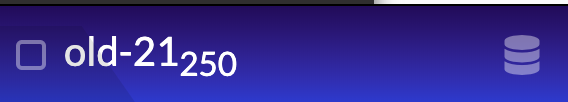


21 번


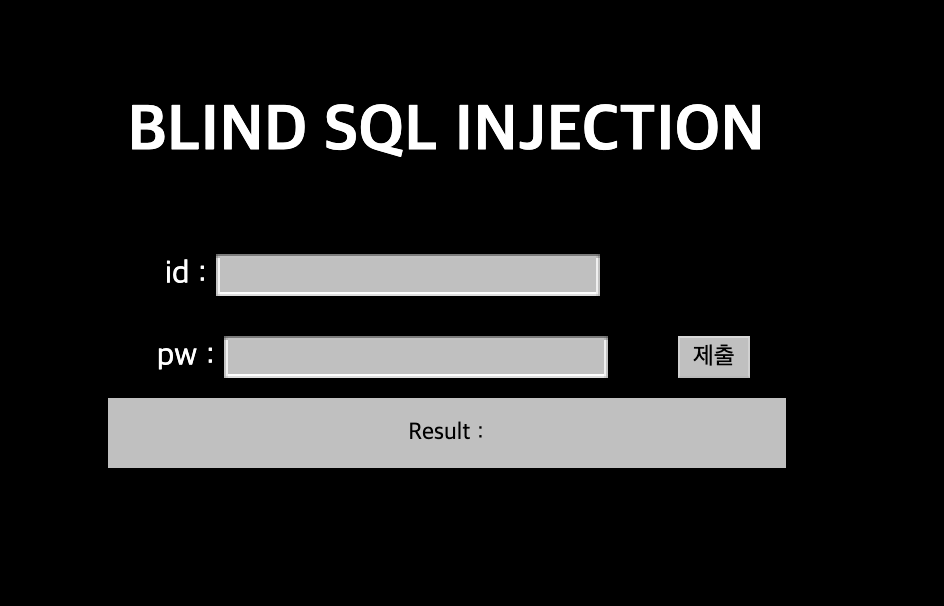


문제에 들어가면, BLIND SQL INJECTION 이라고 친절하게 알려준다.

#Blind Sql Injection 이란?

SQL 질의문 입력으로 나오는 참, 거짓 결과를 이용하여 해당 결과 값을 보고 DB 안의 

데이터나 구조를 파악하는 기법을 의미한다.

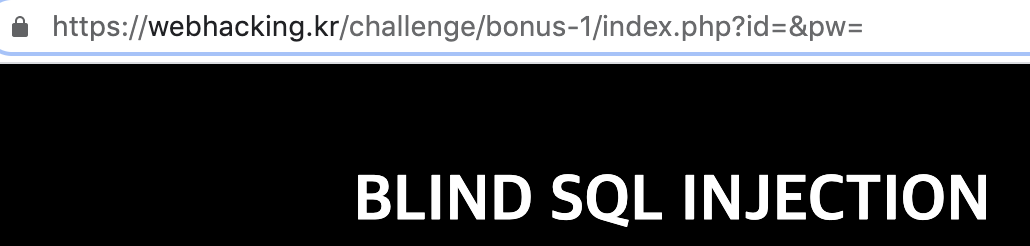


id 와 pw 두 개의 폼으로 받는 구조이다.

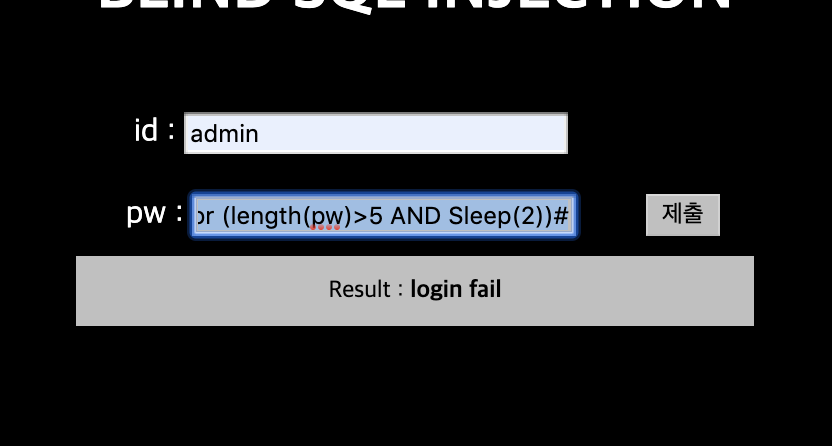

Blind SQL injection 기반으로 True / False 를 받아서 데이터 베이스 안의 정보를 

받아보려고 했으나 True false 정보는 표시를 해주지 않는 구조 인 것 같아 

Time based SQL injection 을 사용했다.

time based SQL injection 을 이용하게 되면 해당 조건이 참일 시 웹페이지가 sleep 

함수에 의해 리로딩 되며 false 인 경우 바로 웹페이지가 새로고침 될 것이다.

기본적인 쿼리는 User 테이블이라고 가정 했을 때

select * from user where id ='admin' and pw=' or length(pw)<값 AND Sleep(2))

처음에는 id = admin를 주고 

pw 에 ' or (length(pw)<100 AND Sleep(2))# 를 주어

pw 의 길이를 구하려고 했다. 100 - 50 - 25  - 37 과 같은 방법으로 구하여

 ' or (length(pw)>37 AND Sleep(2))# 일 때는 sleep 함수가 동작하지 않았다.

' or (length(pw)=36 AND Sleep(2))# 일 때 sleep 함수가 동작하여 페이지가 로딩된다.

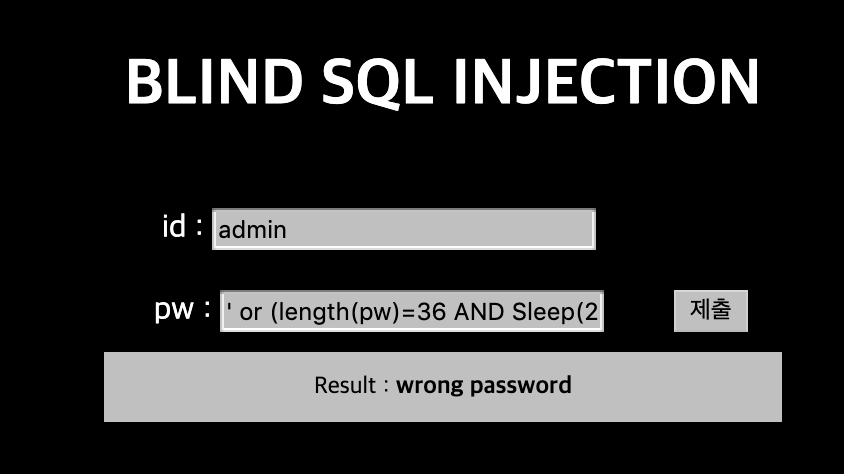

Time based SQL injection 만 가능하다고 생각했는데

맞는 값이 들어올 시 'wrong password' 로 문구가 변하는 것 같다.

True -> wrong password

false -> login fail

로 출력이 되는 것 같다.

그래서 sleep을 사용하지 않고

' or (ascii(substr(pw,1,1))=116 #

이런 식으로 쿼리를 넣었다.

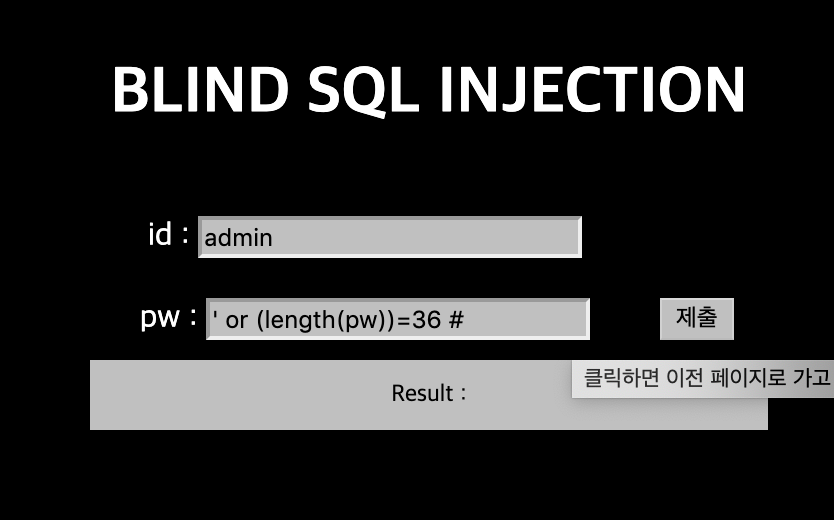

실행 전.

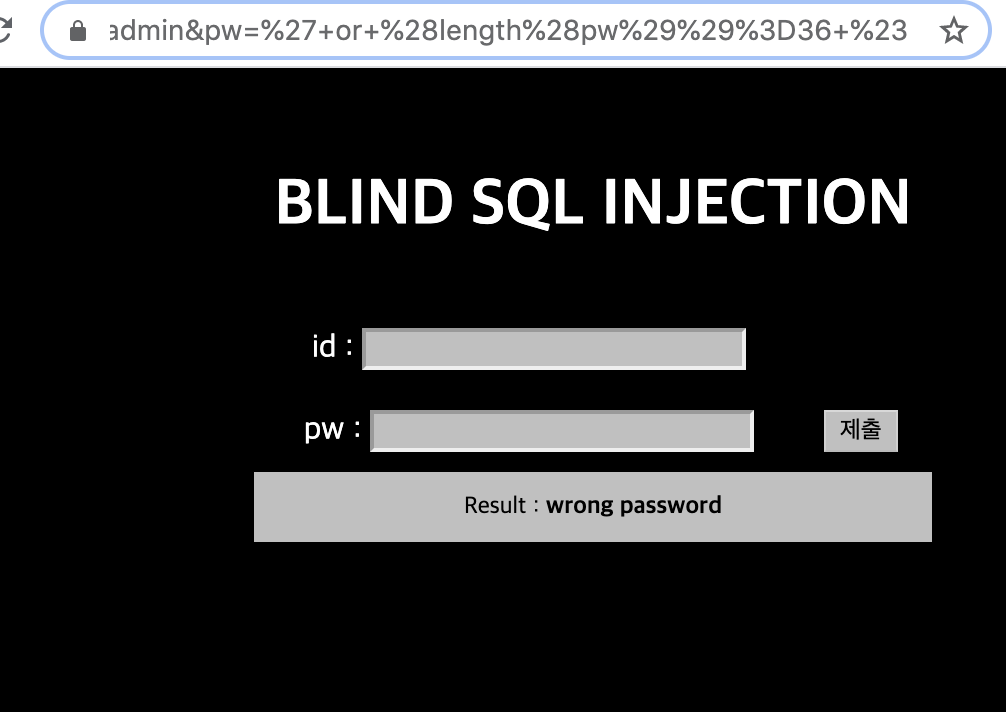

sleep 을 쓰지 않아도 되는 것 같다.

pw 자리수와 id 를 얻어 쿼리를 변경하여

pw를 얻기로 했다.

substr 과 ascii 를 사용했는데

substr(pw , 1 , 1) 과 같이 주면 pw의 첫 째 자리에서 한 자리의 문자를 가져온다.

ascii(해당문자) 는 해당 문자를 아스키 번호로 변경 시켜 준다.

이를 boolean, true false 로 변경하기 위해  쿼리 문을

' or ascii(substr(pw,1,1))<120 # 과 같은 형식으로 만들었다.

해당 쿼리문의 의미는 pw의 첫 째 자리 문자의 아스키코드값이 120 보다 작으면

웹페이지의 Result : 에 wrong password 를 띄우게 될 것이다.

이를 36번 반복하게 되면 전체 문자를 얻을 수 있지만 너무 

복잡하여 파이썬 코드를 만들고 해당 쿼리문을 적용하여 pw 를 구하였다.

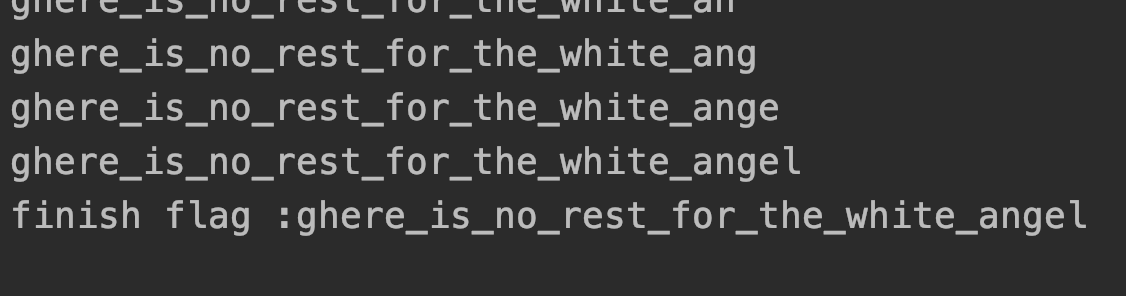

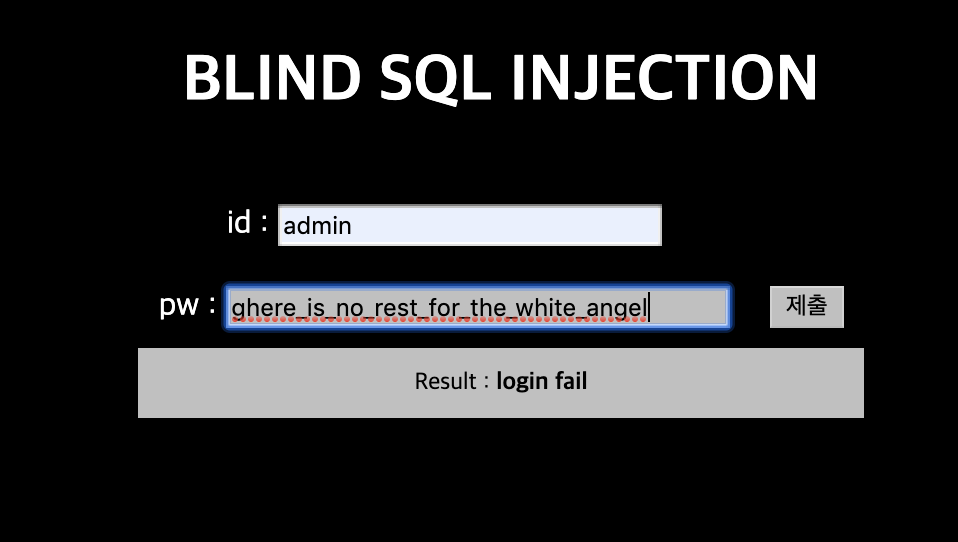







